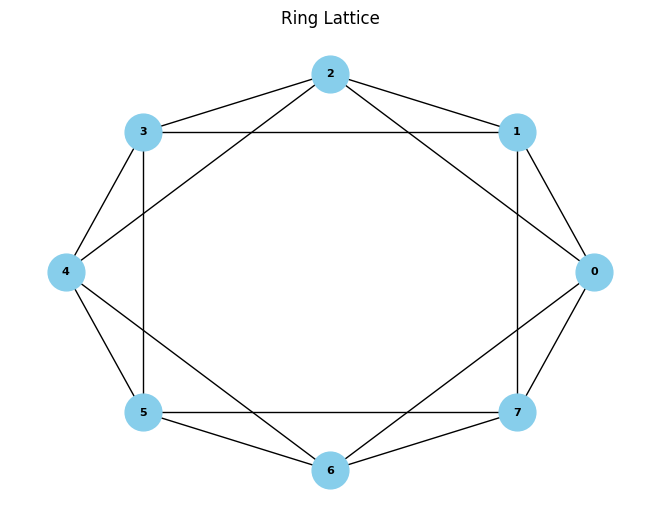

In [136]:
import networkx as nx
import matplotlib.pyplot as plt
from enum import Enum
import random
from random import randint
import numpy as np
import math

def generate_ring_lattice(n, k):
    """
    Generate a ring lattice with n nodes and each node connected to its k nearest neighbors.

    Parameters:
    - n: Number of nodes in the ring lattice.
    - k: Number of nearest neighbors to which each node is connected.

    Returns:
    A ring lattice graph.
    """
    if n < k + 1 or k % 2 != 0:
        raise ValueError("Invalid parameters. Ensure n >= k + 1 and k is even.")

    # Create a ring lattice using the watts_strogatz_graph function
    ring_lattice = nx.watts_strogatz_graph(n, k, 0)

    return ring_lattice

def draw_graph(graph):
    """
    Draw the input graph using Matplotlib.

    Parameters:
    - graph: The graph to be drawn.
    """
    pos = nx.circular_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", node_shape="o")
    plt.title("Ring Lattice")
    plt.show()

# Example usage
n_nodes = 8
nearest_neighbors = 4
ring_lattice_graph = generate_ring_lattice(n_nodes, nearest_neighbors)
draw_graph(ring_lattice_graph)

In [176]:
class State(Enum):
    S = 0
    I = 1
    R = 2
    V = 3

BETA = 0.3
RHO = 0.7

V = 500
k = 4
N = 100
sim_duration = 15
num_init_infected_nodes = 10

def generate_init_infected_nodes(num_nodes,num_infected):
    return random.choices([x for x in range(num_nodes)], k = num_infected)


### Problem 1

In [126]:
new_infected = []
susceptible = []
infected = []
recovered = []

for sim in range(N):
    
    G = generate_ring_lattice(V, k)
    init = generate_init_infected_nodes(V, num_init_infected_nodes) # 500, 10
    for node in G.nodes:
        if node in init:
            G.nodes[node]['state'] = State.I
        else:
            G.nodes[node]['state'] = State.S

    new_infected_record = []
    susceptible_record = []
    infected_record = []
    recovered_record = []

    num_new_infected = 0
    num_susceptible = V - num_init_infected_nodes
    num_infected = num_init_infected_nodes
    num_recovered = 0

    new_infected_record.append(num_new_infected)
    susceptible_record.append(num_susceptible)
    infected_record.append(num_infected)
    recovered_record.append(num_recovered)

    for i in range(sim_duration):
        G_last_step = G.copy()
        num_new_infected = 0

        for node in G.nodes:
            if G.nodes[node]['state'] == State.S:
                m = 0

                for neighbour in G.neighbors(node):
                    if G_last_step.nodes[neighbour]['state'] == State.I:
                        m += 1                
                if random.random() < (1 - (1- BETA) ** m):
                    G.nodes[node]['state'] = State.I
                    num_new_infected += 1
                    num_infected += 1
                    num_susceptible -= 1
                    
            elif G.nodes[node]['state'] == State.I:
                if random.random() < RHO:
                    G.nodes[node]['state'] = State.R
                    num_recovered += 1
                    num_infected -= 1
        
        new_infected_record.append(num_new_infected)
        susceptible_record.append(num_susceptible)
        infected_record.append(num_infected)
        recovered_record.append(num_recovered)

    new_infected.append(new_infected_record)
    susceptible.append(susceptible_record)
    infected.append(infected_record)
    recovered.append(recovered_record)

In [127]:
def calculate_avg(records):
    return np.mean(records, axis = 0)

def plot(x, y, title, x_label, y_label, color,name):
    fig, ax = plt.subplots(figsize = [8,5], dpi = 120)


    ax.step(x, y, where='mid', label='weekly avg', color=color)
    ax.plot(x, y, 'o--', color='grey', alpha=0.3)
    
    ax.grid(axis='x', color='0.95')
    ax.set_xticks(x)
    ax.set_xlabel(x_label ,fontstyle = "italic", size = 9)
    ax.set_ylabel(y_label, fontstyle = "italic", size = 9)
    ax.set_xlim(left=0,right = 15)
    
    ax.legend()
    plt.savefig(f'fig/{name}.png')
    ax.set_title(title, fontsize =13)
    plt.show()

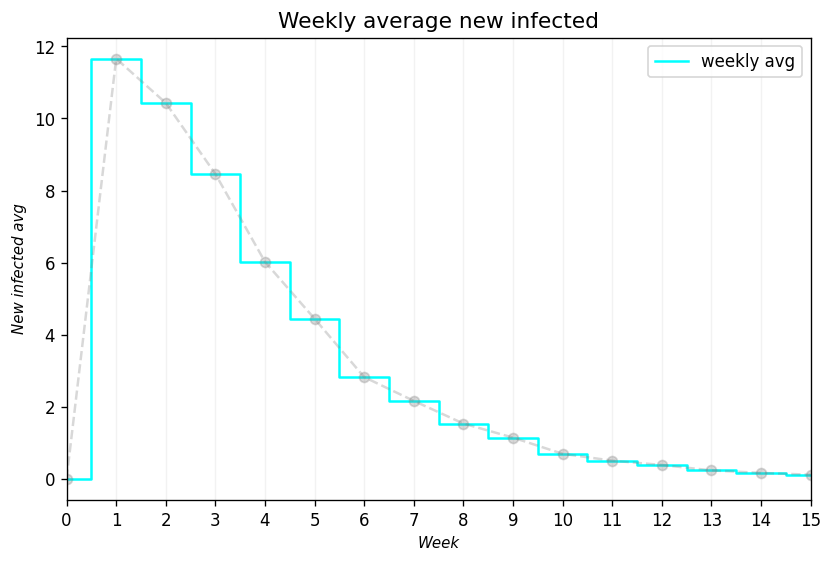

In [128]:
plot(x = np.arange(16), y=calculate_avg(new_infected), title="Weekly average new infected", x_label="Week", y_label="New infected avg", color="cyan",name = 'ex_1.1_newinfected')

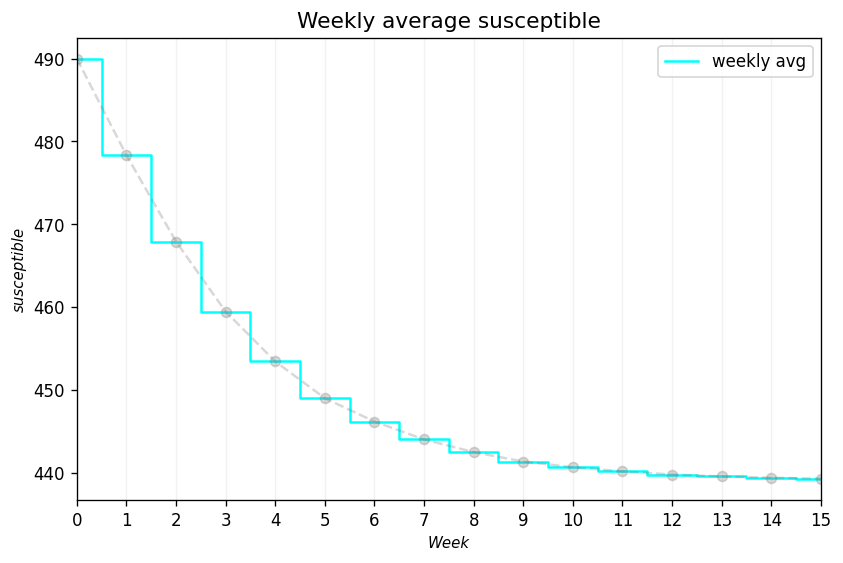

In [129]:
plot(x = np.arange(16), y=calculate_avg(susceptible), title="Weekly average susceptible", x_label="Week", y_label="susceptible", color="cyan",name = 'ex_1.1_susceptible')

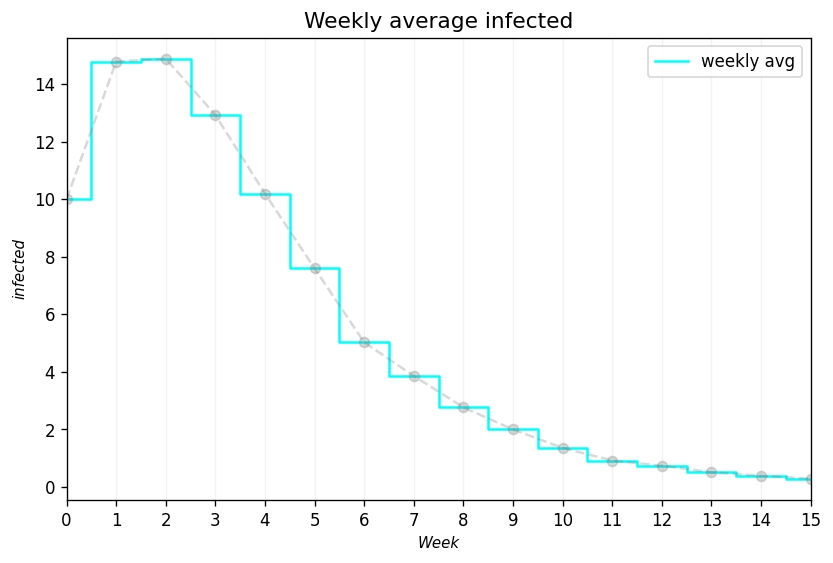

In [130]:
plot(x = np.arange(16), y=calculate_avg(infected), title="Weekly average infected", x_label="Week", y_label="infected", color="cyan",name = 'ex_1.1_infected')

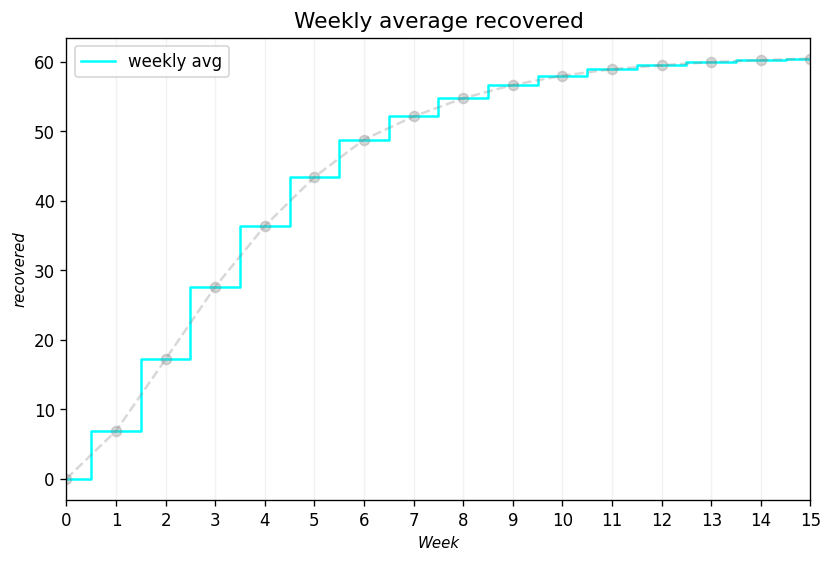

In [131]:
plot(x = np.arange(16), y=calculate_avg(recovered), title="Weekly average recovered", x_label="Week", y_label="recovered", color="cyan",name = 'ex_1.1_recovered')

In [144]:
def generate_preferential_attachment_random_graph(k, num_nodes):
    G = nx.complete_graph(k + 1)
    c = k / 2

    k_odd = False
    counter = 0

    if k % 2 != 0:
        k_odd = True
        

    for node in range(k+1, num_nodes):     
        #in case k is odd, alternatively modify c   
        if k_odd:
            if counter == 0:
                c = math.ceil(k/2)
                counter = 1
            else:
                c = math.floor(k/2)
                counter = 0

        degree_distr = [] 

        for n, d in G.degree():
            degree_distr.append(d)
            
        prob = [d/sum(degree_distr) for d in degree_distr]

        neighbors = np.random.choice(np.arange(len(G)), p=prob, size=int(c), replace=False)

        G.add_node(node)
        for n in neighbors:
            G.add_edge(node,n)
                
    return G

In [149]:
#Example 

size = 900

preferential_at_graph = generate_preferential_attachment_random_graph(k = 4, num_nodes=size)

tot_degree = 0
for n, d in preferential_at_graph.degree():
    tot_degree += d

print(tot_degree / size)

4.0


### Problem 2

In [150]:
new_infected = []
susceptible = []
infected = []
recovered = []
random_graph = generate_preferential_attachment_random_graph(k = 6, num_nodes=500)


for sim in range(N):
    
    G = random_graph.copy()
    init = generate_init_infected_nodes(V, num_init_infected_nodes) # 500, 10
    for node in G.nodes:
        if node in init:
            G.nodes[node]['state'] = State.I
        else:
            G.nodes[node]['state'] = State.S

    new_infected_record = []
    susceptible_record = []
    infected_record = []
    recovered_record = []

    num_new_infected = 0
    num_susceptible = V - num_init_infected_nodes
    num_infected = num_init_infected_nodes
    num_recovered = 0

    new_infected_record.append(num_new_infected)
    susceptible_record.append(num_susceptible)
    infected_record.append(num_infected)
    recovered_record.append(num_recovered)

    for i in range(sim_duration):
        G_last_step = G.copy()
        num_new_infected = 0

        for node in G.nodes:
            if G.nodes[node]['state'] == State.S:
                m = 0

                for neighbour in G.neighbors(node):
                    if G_last_step.nodes[neighbour]['state'] == State.I:
                        m += 1                
                if random.random() < (1 - (1- BETA) ** m):
                    G.nodes[node]['state'] = State.I
                    num_new_infected += 1
                    num_infected += 1
                    num_susceptible -= 1
                    
            elif G.nodes[node]['state'] == State.I:
                if random.random() < RHO:
                    G.nodes[node]['state'] = State.R
                    num_recovered += 1
                    num_infected -= 1
        
        new_infected_record.append(num_new_infected)
        susceptible_record.append(num_susceptible)
        infected_record.append(num_infected)
        recovered_record.append(num_recovered)

    new_infected.append(new_infected_record)
    susceptible.append(susceptible_record)
    infected.append(infected_record)
    recovered.append(recovered_record)

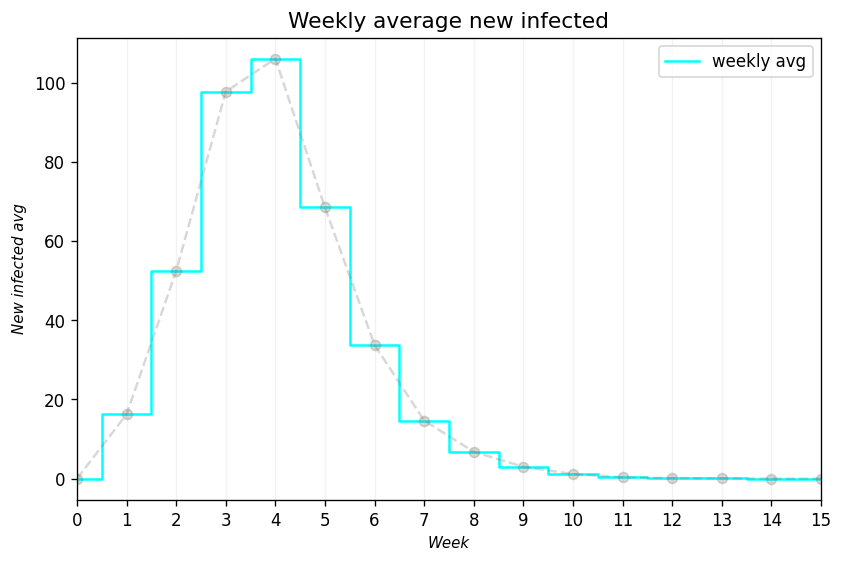

In [151]:
plot(x = np.arange(16), y=calculate_avg(new_infected), title="Weekly average new infected", x_label="Week", y_label="New infected avg", color="cyan",name = 'ex_1.2_newinfected')

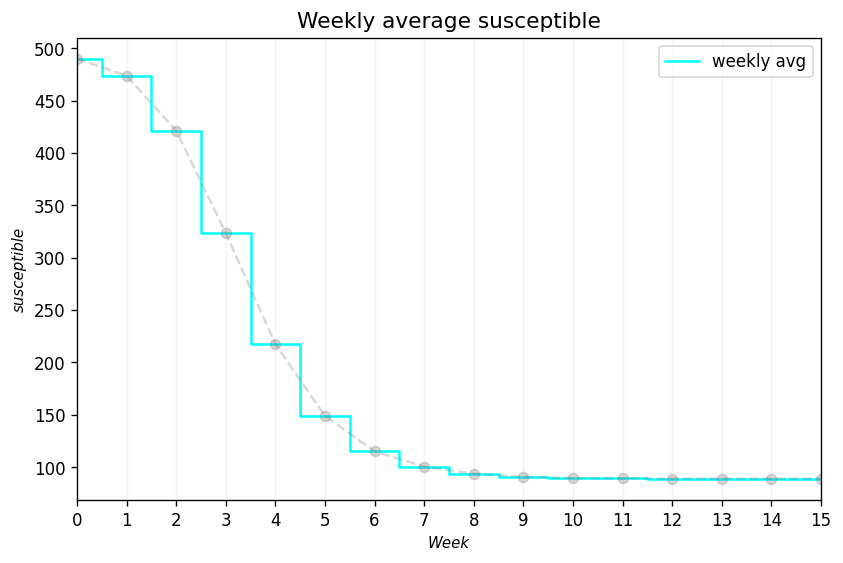

In [152]:
plot(x = np.arange(16), y=calculate_avg(susceptible), title="Weekly average susceptible", x_label="Week", y_label="susceptible", color="cyan",name = 'ex_1.2_susceptible')

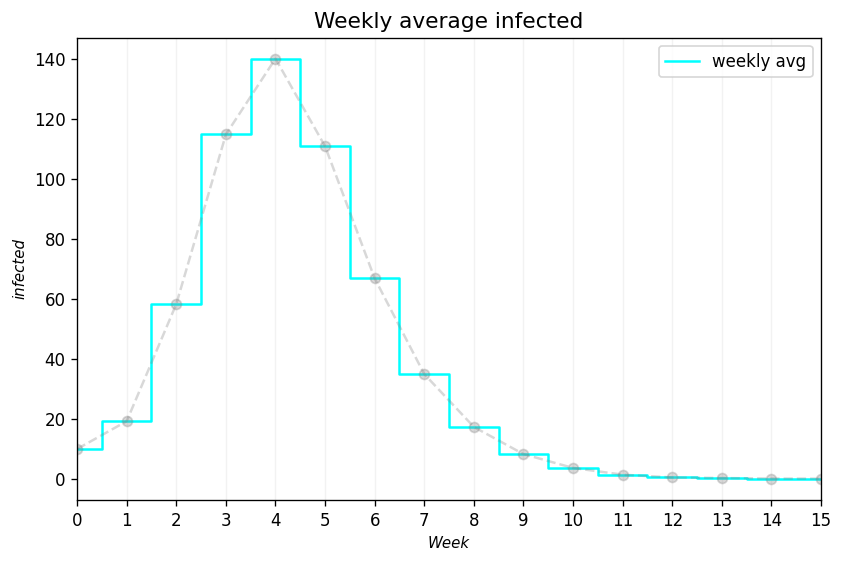

In [153]:
plot(x = np.arange(16), y=calculate_avg(infected), title="Weekly average infected", x_label="Week", y_label="infected", color="cyan",name = 'ex_1.2_infected')

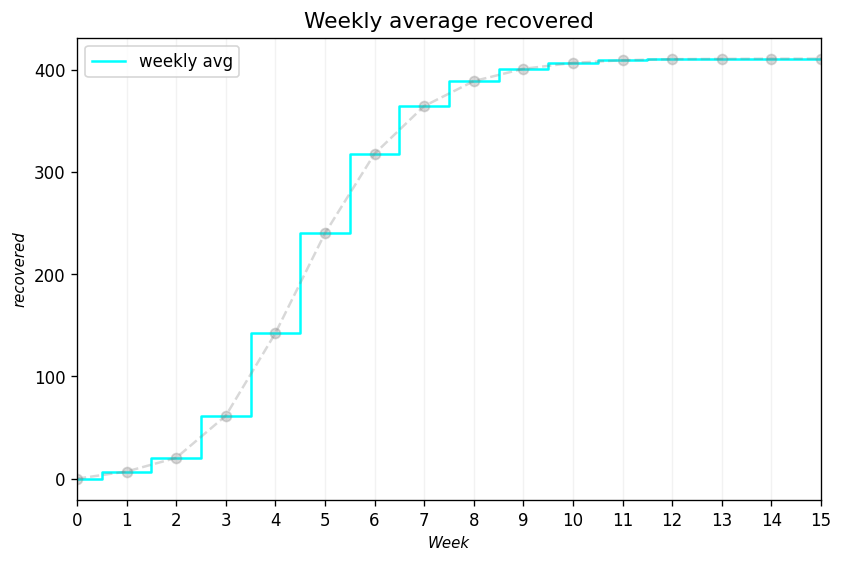

In [154]:
plot(x = np.arange(16), y=calculate_avg(recovered), title="Weekly average recovered", x_label="Week", y_label="recovered", color="cyan",name = 'ex_1.2_recovered')

### Problem 3

In [178]:
vacc = [0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60]
def vacc_percent_each_week(vaccination):
    extended = vaccination[1:]
    extended.append(vaccination[-1])

    return np.array(extended) - np.array(vaccination)


In [220]:
new_infected = []
new_vaccinated = []
vaccinated = []
susceptible = []
infected = []
recovered = []
random_graph = generate_preferential_attachment_random_graph(k = 6, num_nodes=500)

percent_each_week = vacc_percent_each_week(vacc)


for sim in range(N):
    
    G = random_graph.copy()
    init = generate_init_infected_nodes(V, num_init_infected_nodes) # 500, 10

    for node in G.nodes:
        if node in init:
            G.nodes[node]['state'] = State.I
        else:
            G.nodes[node]['state'] = State.S

    new_infected_record = []
    new_vaccinated_record = []
    vaccinated_record = []
    susceptible_record = []
    infected_record = []
    recovered_record = []

    num_new_infected = 0
    num_new_vaccinated = 0
    num_vaccinated = 0
    num_susceptible = V - num_init_infected_nodes
    num_infected = num_init_infected_nodes
    num_recovered = 0

    new_infected_record.append(num_new_infected)
    new_vaccinated_record.append(num_new_vaccinated)
    susceptible_record.append(num_susceptible)
    infected_record.append(num_infected)
    recovered_record.append(num_recovered)

    unvaccinated_index = [i for i in range(V)]

    for i in range(sim_duration):
        G_last_step = G.copy()
        num_new_infected = 0
        num_new_vacinated = 0
        random.shuffle(unvaccinated_index)


        num_new_vaccinated = int(percent_each_week[i] * V / 100)

        if num_new_vaccinated > 0:
            for _ in range(num_new_vaccinated):
                node = unvaccinated_index.pop()
                if G.nodes[node]['state'] == State.S:
                    num_susceptible -= 1
                elif G.nodes[node]['state'] == State.I:
                    num_infected -= 1
                else:
                    num_recovered -= 1
                
                G.nodes[node]['state'] = State.V
            
            num_vaccinated += num_new_vaccinated
        
        for node in G.nodes:
            if G.nodes[node]['state'] == State.S:
                m = 0

                for neighbour in G.neighbors(node):
                    if G_last_step.nodes[neighbour]['state'] == State.I:
                        m += 1                
                if random.random() < (1 - (1- BETA) ** m):
                    G.nodes[node]['state'] = State.I
                    num_new_infected += 1
                    num_infected += 1
                    num_susceptible -= 1
                    
            elif G.nodes[node]['state'] == State.I:
                if random.random() < RHO:
                    G.nodes[node]['state'] = State.R
                    num_recovered += 1
                    num_infected -= 1
        
        new_infected_record.append(num_new_infected)
        susceptible_record.append(num_susceptible)
        infected_record.append(num_infected)
        recovered_record.append(num_recovered)
        new_vaccinated_record.append(num_new_vaccinated)
        vaccinated_record.append(num_vaccinated)

    new_infected.append(new_infected_record)
    new_vaccinated.append(new_vaccinated_record)
    susceptible.append(susceptible_record)
    infected.append(infected_record)
    recovered.append(recovered_record)

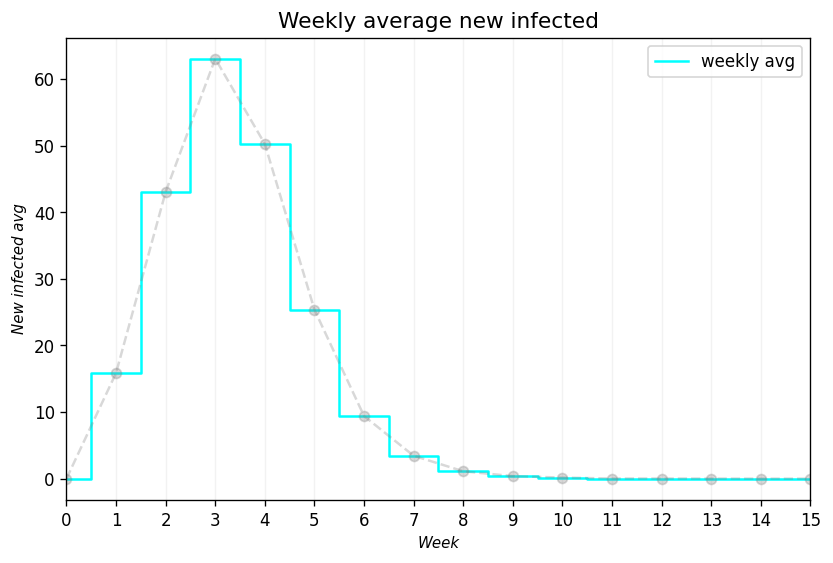

In [221]:
plot(x = np.arange(16), y=calculate_avg(new_infected), title="Weekly average new infected", x_label="Week", y_label="New infected avg", color="cyan",name = 'ex_1.3_newinfected')

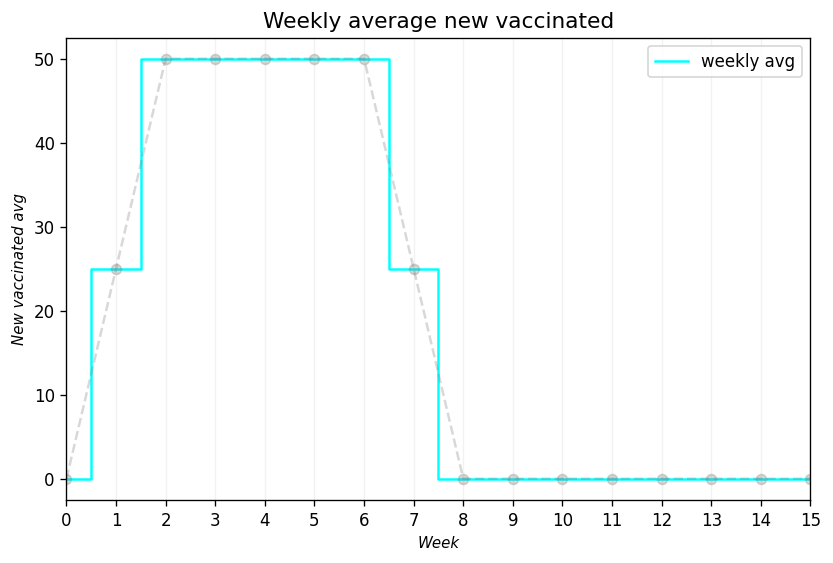

In [222]:
plot(x = np.arange(16), y=calculate_avg(new_vaccinated), title="Weekly average new vaccinated", x_label="Week", y_label="New vaccinated avg", color="cyan",name = 'ex_1.3_newvaccinated')

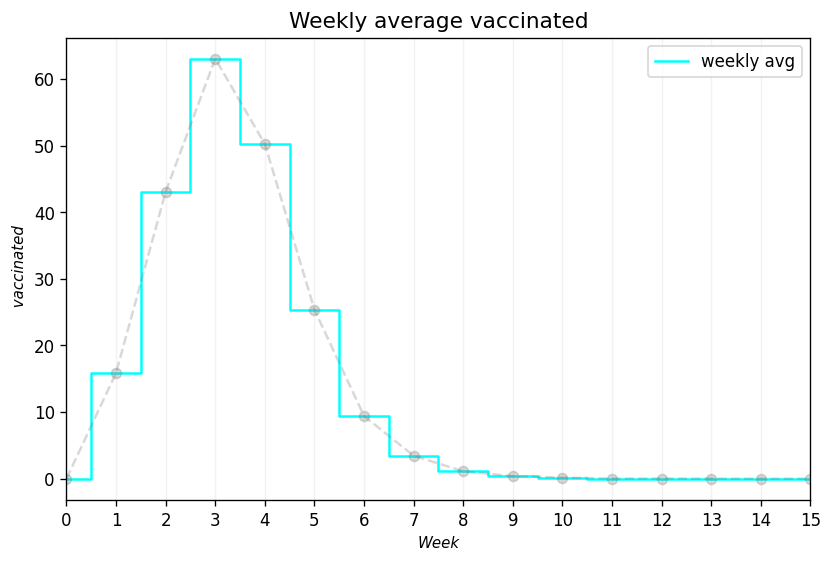

In [223]:
plot(x = np.arange(16), y=calculate_avg(new_infected), title="Weekly average vaccinated", x_label="Week", y_label=" vaccinated", color="cyan",name = 'ex_1.3_vaccinated')

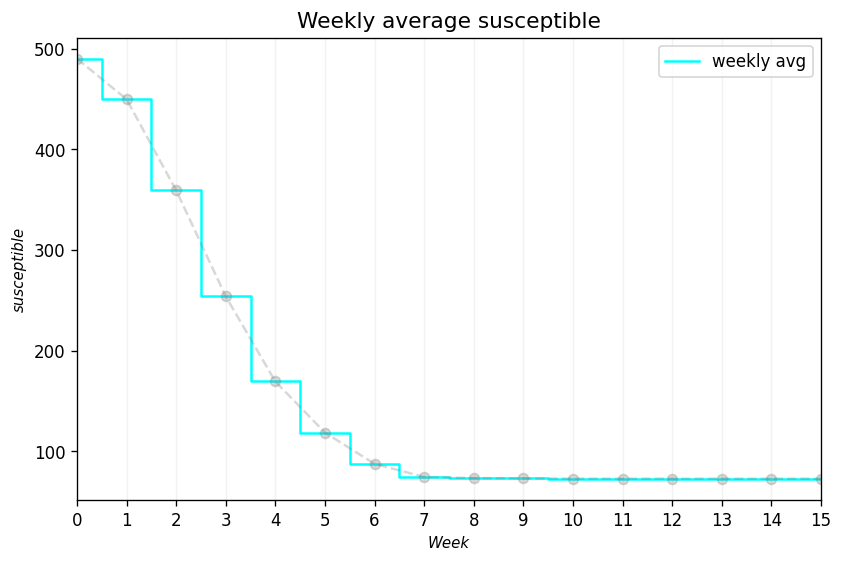

In [224]:
plot(x = np.arange(16), y=calculate_avg(susceptible), title="Weekly average susceptible", x_label="Week", y_label="susceptible", color="cyan",name = 'ex_1.3_susceptible')

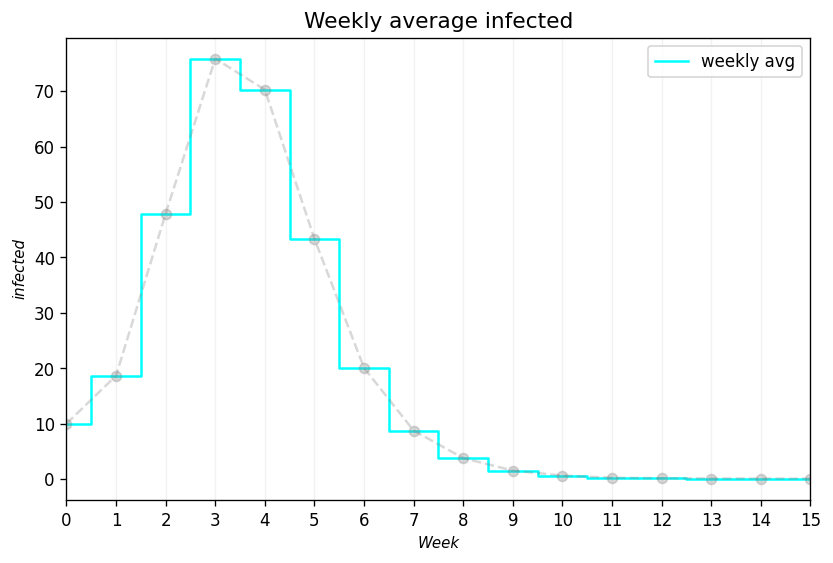

In [225]:
plot(x = np.arange(16), y=calculate_avg(infected), title="Weekly average infected", x_label="Week", y_label="infected", color="cyan",name = 'ex_1.3_infected')

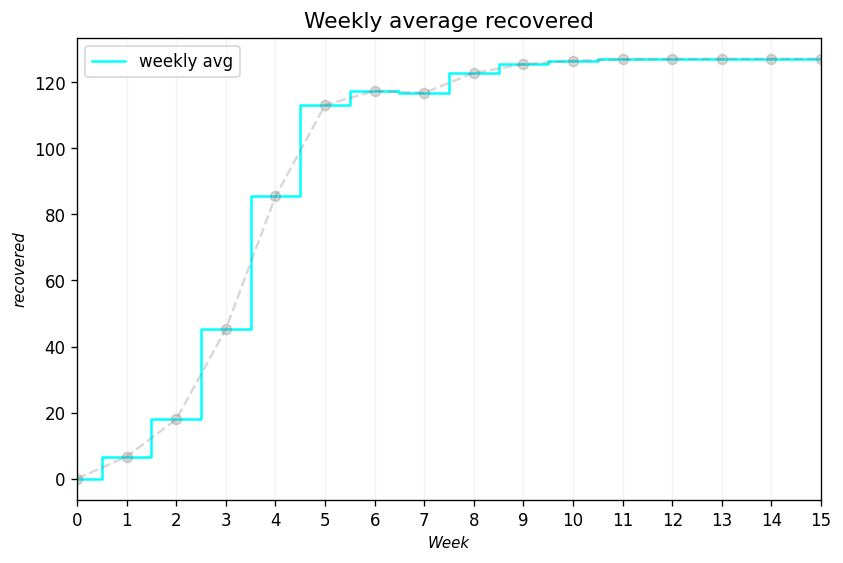

In [226]:
plot(x = np.arange(16), y=calculate_avg(recovered), title="Weekly average recovered", x_label="Week", y_label="recovered", color="cyan",name = 'ex_1.3_recovered')

### Problem 4

In [269]:
vacc = [5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60, 60]
I_0 = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]
sim_duration = 15
N = 10
V = 934

In [272]:
def simulate(k, beta, rho):
    new_infected = []
    new_vaccinated = []
    vaccinated = []
    susceptible = []
    infected = []
    recovered = []
    random_graph = generate_preferential_attachment_random_graph(k = k, num_nodes=V)

    percent_each_week = vacc_percent_each_week(vacc)


    for sim in range(N):
        
        G = random_graph.copy()
        init = generate_init_infected_nodes(V, I_0[0])

        for node in G.nodes:
            if node in init:
                G.nodes[node]['state'] = State.I
            else:
                G.nodes[node]['state'] = State.S

        new_infected_record = []
        new_vaccinated_record = []
        vaccinated_record = []
        susceptible_record = []
        infected_record = []
        recovered_record = []

        num_new_infected = I_0[0]
        num_new_vaccinated = 0
        num_vaccinated = 0
        num_susceptible = V - num_init_infected_nodes
        num_infected = num_init_infected_nodes
        num_recovered = 0

        new_infected_record.append(num_new_infected)
        new_vaccinated_record.append(num_new_vaccinated)
        susceptible_record.append(num_susceptible)
        infected_record.append(num_infected)
        recovered_record.append(num_recovered)
        vaccinated_record.append(num_vaccinated)

        unvaccinated_index = [i for i in range(V)]

        for i in range(sim_duration):
            G_last_step = G.copy()
            num_new_infected = 0
            num_new_vacinated = 0
            random.shuffle(unvaccinated_index)


            num_new_vaccinated = int(percent_each_week[i] * V / 100)

            if num_new_vaccinated > 0:
                for _ in range(num_new_vaccinated):
                    node = unvaccinated_index.pop()
                    if G.nodes[node]['state'] == State.S:
                        num_susceptible -= 1
                    elif G.nodes[node]['state'] == State.I:
                        num_infected -= 1
                    else:
                        num_recovered -= 1
                    
                    G.nodes[node]['state'] = State.V
                
                num_vaccinated += num_new_vaccinated
            
            for node in G.nodes:
                if G.nodes[node]['state'] == State.S:
                    m = 0

                    for neighbour in G.neighbors(node):
                        if G_last_step.nodes[neighbour]['state'] == State.I:
                            m += 1                
                    if random.random() < (1 - (1- beta) ** m):
                        G.nodes[node]['state'] = State.I
                        num_new_infected += 1
                        num_infected += 1
                        num_susceptible -= 1
                        
                elif G.nodes[node]['state'] == State.I:
                    if random.random() < rho:
                        G.nodes[node]['state'] = State.R
                        num_recovered += 1
                        num_infected -= 1
            
            new_infected_record.append(num_new_infected)
            susceptible_record.append(num_susceptible)
            infected_record.append(num_infected)
            recovered_record.append(num_recovered)
            new_vaccinated_record.append(num_new_vaccinated)
            vaccinated_record.append(num_vaccinated)

        new_infected.append(new_infected_record)
        new_vaccinated.append(new_vaccinated_record)
        susceptible.append(susceptible_record)
        infected.append(infected_record)
        recovered.append(recovered_record)
        vaccinated.append(vaccinated_record)
    return calculate_avg(new_infected), calculate_avg(new_vaccinated), calculate_avg(susceptible), calculate_avg(infected), calculate_avg(recovered), calculate_avg(vaccinated)

In [291]:
from itertools import product

convergence = False
parameters = (10, 0.3, 0.6)
delta = (1, 0.1, 0.1)
best_RMSE = None
best_parameters = parameters
counter = 0

while not convergence:
    print(f'epoch {counter}')
    degree = (parameters[0] - delta[0], parameters[0], parameters[0] + delta[0])
    beta = (parameters[1] - delta[1], parameters[1], parameters[1] + delta[1])
    rho = (parameters[2] - delta[2], parameters[2], parameters[2] + delta[2])

    set_of_parameters = product(degree, beta, rho)

    for p in set_of_parameters:
        new_infected,_,_,_,_,_ = simulate(p[0], p[1], p[2])
        rmsq = np.sqrt(np.mean((I_0 - new_infected)**2))

        if best_RMSE is None:
            best_RMSE = rmsq
        else:
            if rmsq < best_RMSE:
                best_RMSE = rmsq
                best_parameters = p
            
    
    if parameters == best_parameters and counter < 10:
        parameters = best_parameters
        delta = (delta[0], delta[1]/2, delta[2]/2)
        counter += 1
    
    if parameters != best_parameters:
        parameters = best_parameters
        counter += 1
        delta = (1,0.1,0.1)
    
    if counter >= 10:
        convergence = True


epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


In [292]:
result = simulate(best_parameters[0], best_parameters[1], best_parameters[2])

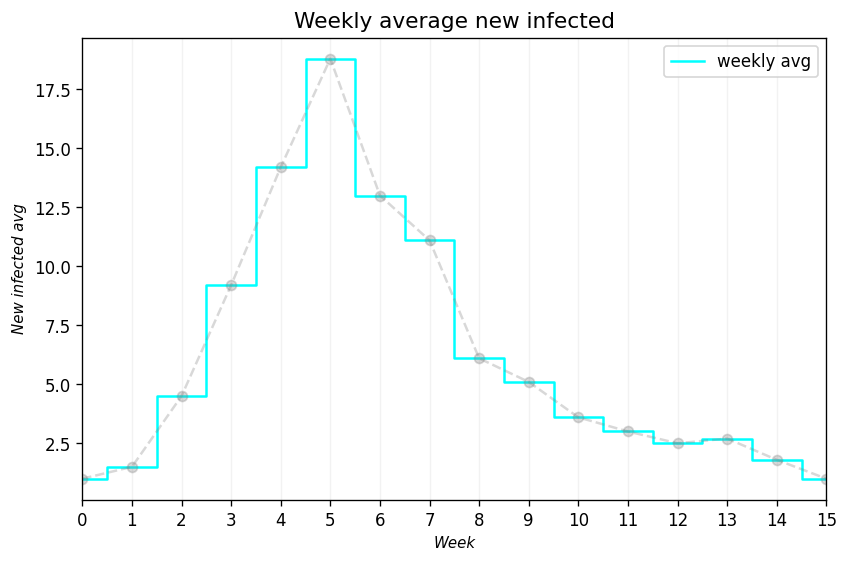

In [293]:
plot(x = np.arange(16), y=result[0], title="Weekly average new infected", x_label="Week", y_label="New infected avg", color="cyan",name = 'ex_1.4_newinfected')

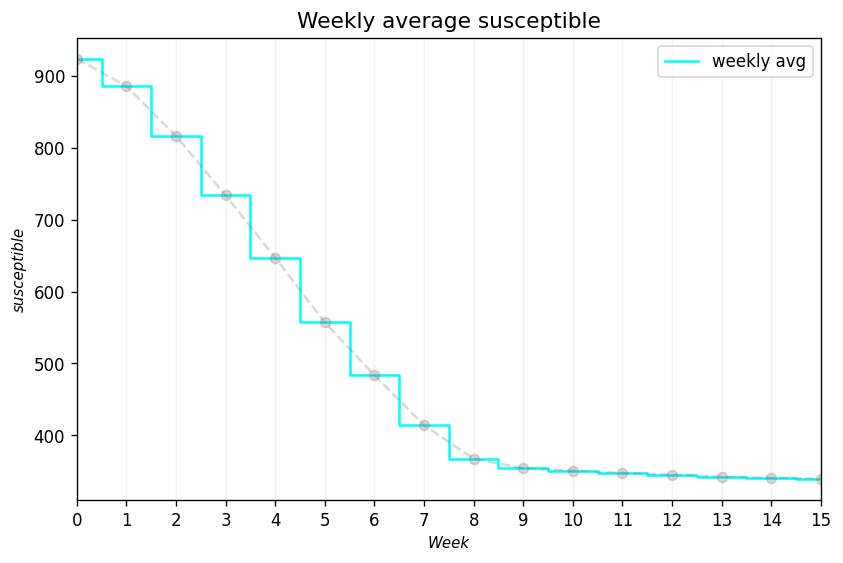

In [294]:
plot(x = np.arange(16), y=result[2], title="Weekly average susceptible", x_label="Week", y_label="susceptible", color="cyan",name = 'ex_1.4_susceptible')

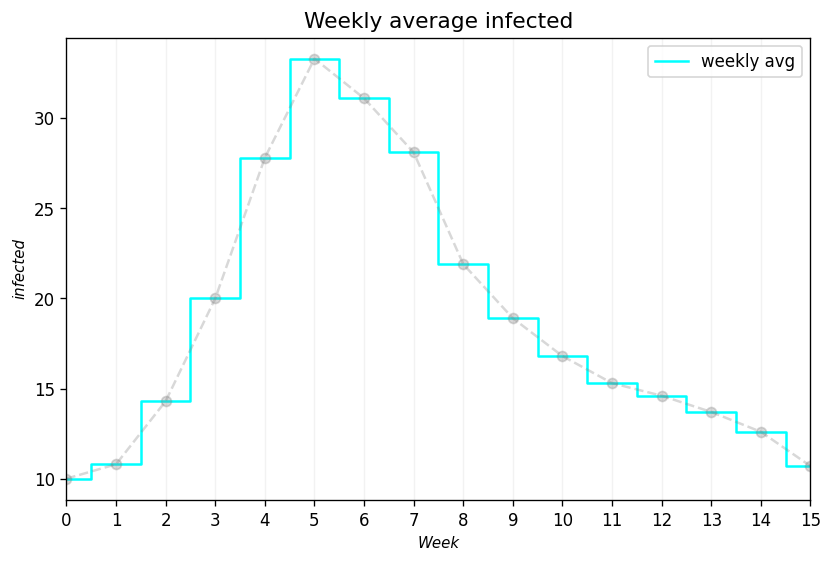

In [295]:
plot(x = np.arange(16), y=result[3], title="Weekly average infected", x_label="Week", y_label="infected", color="cyan",name = 'ex_1.4_infected')

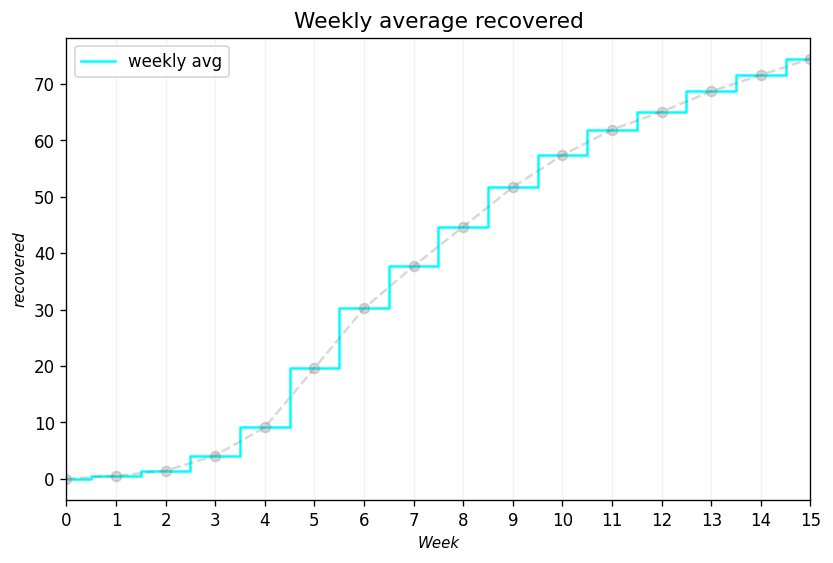

In [296]:
plot(x = np.arange(16), y=result[4], title="Weekly average recovered", x_label="Week", y_label="recovered", color="cyan",name = 'ex_1.4_recovered')

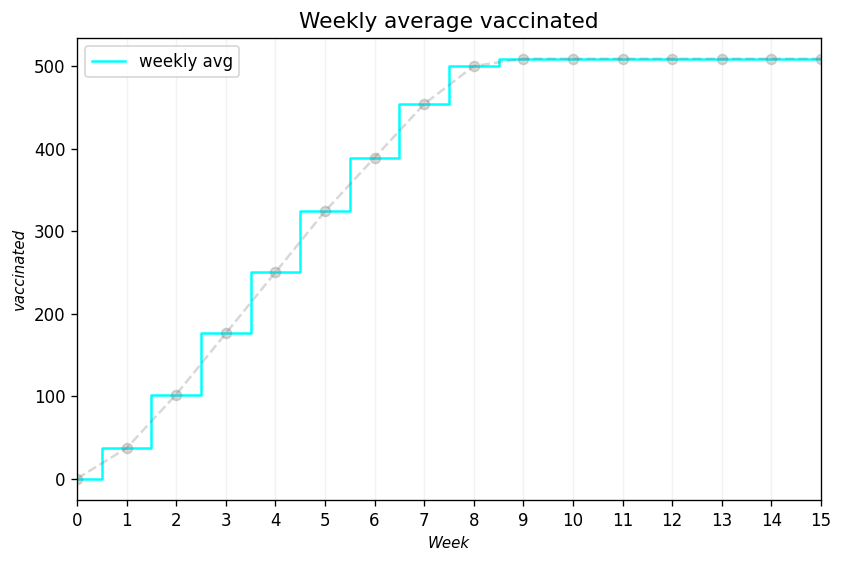

In [297]:
plot(x = np.arange(16), y=result[5], title="Weekly average vaccinated", x_label="Week", y_label="vaccinated", color="cyan",name = 'ex_1.4_vaccinated')

In [298]:
best_parameters

(12, 0.11249999999999998, 0.5875)

In [300]:
best_RMSE

4.481001562151033